In [1]:
## 1. Data Processing
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

## 2. Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Advanced Visualization
import missingno as msno
import urllib
from PIL import Image

## 4. Computation
import math

## 5. Predictive Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

## 6. Confusion Matrix
from sklearn.metrics import confusion_matrix

## Step 1: Business Problem(s)

#### “To find out the room type given the features of a house”

It is quite common that the hosts in Airbnb may enter the wrong room types when they list their rooms. Some hosts might even purposely do so to draw more attention to earn a higher profit. The inaccurate information may mislead the customer and can cause customer dissatisfaction, which leads to negative reviews of listing. In long run, it affects the host's revenue and reputation if this problem isn't addressed.

## Step 2: Define Goal(s)

Our goal is to ensure the hosts do not enter the wrong information when they list their rooms. Based on the information/properties of the rooms such as price and location, we hope to identify abnormalities or possible errors in the listing process. 

## Step 3: Select / Identify Data

Assumptions: <br>
All raw data is collected from Airbnb directly, which implies: <br>
1) Outliers (e.g. rooms with $10,000/night) are not invalid information and cannot be justified by the features of the room or house <br>
2) Price=0 is missing data as leasing a room or house for free is not reasonable <br>
3) No duplicates of data (each room is listed uniquely)

In [2]:
# Load the Airbnb dataset
# Change the data type of the column 'last_review' from String to date times
df = pd.read_csv("./AB_NYC_2019.csv", parse_dates=['last_review']) 
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Brief information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null datetime64[ns]
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-nu

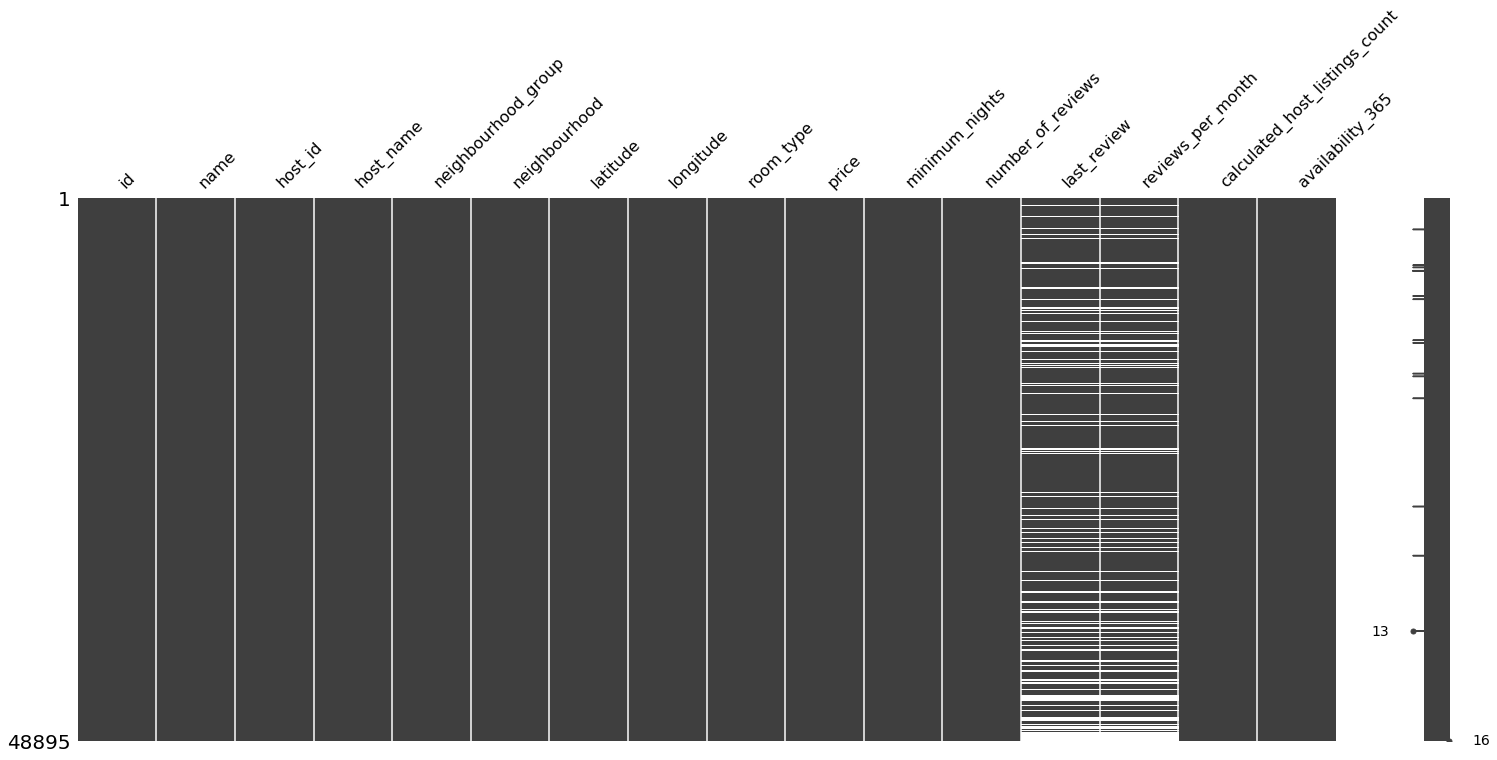

In [4]:
# Visualize the missing data of each column with the bar plot
msno.matrix(df)

In [5]:
# All column's names in the dataset
print(df.columns)

# The dimension of the datset (rows,columns)
print(df.shape)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
(48895, 16)


## Step 4: Prepare Data
Before handling the data, we first take a look into the brief information and statistics of the dataset. Some graphs like the map of the rooms in NYC would also help us to find out the pattern or distribution of the rooms. 


In [6]:
# Brief Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null datetime64[ns]
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-nu

In [7]:
# Brief statistics of the dataset
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


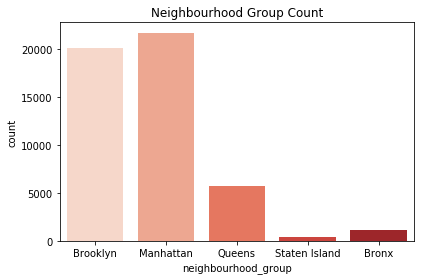

In [8]:
# Bar chart which shows the frequency of rooms in different neighbourhood groups

ax = sns.countplot(df['neighbourhood_group'], palette='Reds')
ax.set_title('Neighbourhood Group Count')
plt.tight_layout()

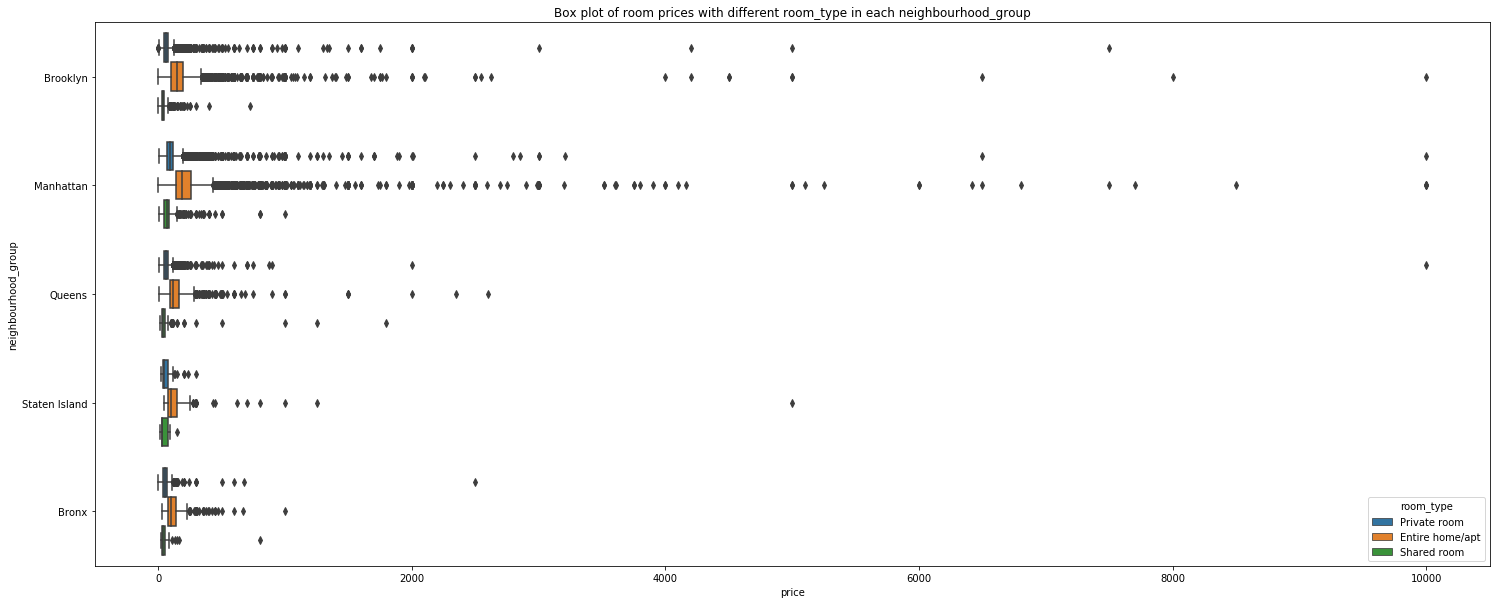

In [9]:
# Boxplot of prices of different room_type in different neighbourhood_group
plt.figure(figsize=(25,10))
sns.boxplot('price','neighbourhood_group',hue = 'room_type', data = df)
plt.title('Box plot of room prices with different room_type in each neighbourhood_group')
plt.show()

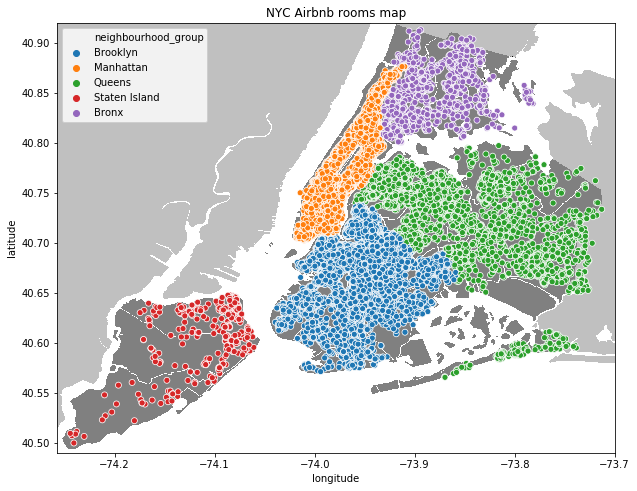

In [10]:
# Scatterplot indicating the location of different neighbourhood groups

# Store the NYC map image to a variable
try:  
    img = Image.open("./New_York_City_.png")
except: 
    img = plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))


plt.figure(figsize=(10,8))

df_long = df.longitude # The longitude values of the rooms
df_lat = df.latitude # The latitude values of the rroms
ax = sns.scatterplot(df_long,df_lat,hue=df.neighbourhood_group)

plt.imshow(img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
plt.title('NYC Airbnb rooms map')
plt.show()

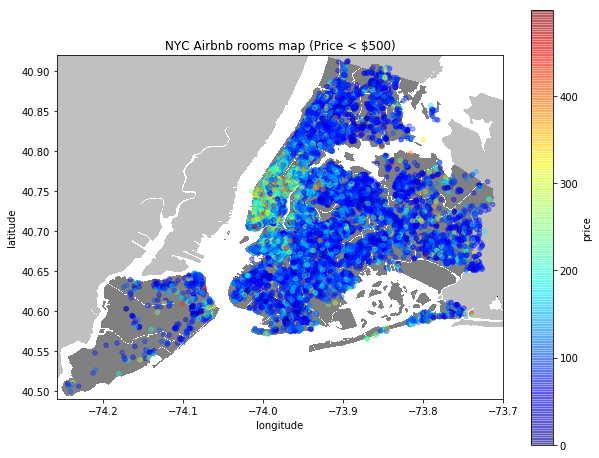

In [11]:
'''
A heat map which shows locations of rooms in NYC  with colors indicating the price level
[color meaning: warmer --> higher , cooler --> lower]
'''

# Create the plot
plt.figure(figsize=(10,8))

# Show the NYC map image on the plot
plt.imshow(img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])

# The axes of the plot
ax=plt.gca()

# Plot the rooms on the map with price < $500
# (As most of the rooms are priced below $500,the heatmap couldn't show the distribution clearly
#   if the price range is too large)
df_500=df[df.price<500]
df_500.plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax, cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4)
plt.title('NYC Airbnb rooms map (Price < $500)')
plt.show()

### Removing Column Data
Based on our own judgement, we think most of the non-numerical columns such as 'name' and 'host_name' are irrelevant to our main scope. Besides, columns like 'id' and 'host_id' are not helpful as they are just similar to 'name' and 'host_name' which are for identification.

For the columns 'number_of_reviews', 'last_review' and 'reviews_per_month', we think it is not appropriate to involve these features for the model due to the limitation of the dataset. Without knowing the reviews are whether positive or negative, it would be better to ignore these features in the model training. Otherwise, it will affect the decision making of the predictive model.

While we have 'neighbourhood_group', 'latitude' and 'longitude' to indicate the rooms location in a more precise way, we could remove the feature 'neighbourhood' from the dataset.

In [12]:
# Remove irrelevant columns based on subjective judgement

df.drop(['id','name', 'host_id', 'host_name','neighbourhood','number_of_reviews', 'last_review', 'reviews_per_month'], axis=1, inplace=True)

# the remaining columns after removal
print(df.columns)

Index(['neighbourhood_group', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'calculated_host_listings_count', 'availability_365'],
      dtype='object')


### Handling Missing Data

#### 1. Column: Price
We observe that some of the rooms are listed with price = 0 and these abnormal data would be regarded as 'missing data' (no free rooms on Airbnb in the normal situation). We would replace these prices with the average price based on the location ('neighbourhood_group') and type of room ('room_type').

In [13]:
# 1. Display the first 5 records with price = 0
df[df['price'] == 0].head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
23161,Brooklyn,40.69023,-73.95428,Private room,0,4,4,28
25433,Bronx,40.83296,-73.88668,Private room,0,2,4,127
25634,Brooklyn,40.69467,-73.92433,Private room,0,2,5,0
25753,Brooklyn,40.72462,-73.94072,Private room,0,2,2,0
25778,Brooklyn,40.70838,-73.94645,Entire home/apt,0,5,1,73


In [14]:
# 2. Convert the records with price = 0 to the value 'NaN' first
df['price'].replace(0, np.nan, inplace=True)

In [15]:
# 3. Check the records again after the replacement
df[df['price'].isnull()]

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
23161,Brooklyn,40.69023,-73.95428,Private room,NaN,4,4,28
25433,Bronx,40.83296,-73.88668,Private room,NaN,2,4,127
25634,Brooklyn,40.69467,-73.92433,Private room,NaN,2,5,0
25753,Brooklyn,40.72462,-73.94072,Private room,NaN,2,2,0
25778,Brooklyn,40.70838,-73.94645,Entire home/apt,NaN,5,1,73
25794,Brooklyn,40.68173,-73.91342,Private room,NaN,1,6,176
25795,Brooklyn,40.68279,-73.91170,Private room,NaN,1,6,232
25796,Brooklyn,40.68258,-73.91284,Private room,NaN,1,6,222
26259,Manhattan,40.75091,-73.97597,Entire home/apt,NaN,3,1,0
26841,Brooklyn,40.69211,-73.90670,Shared room,NaN,30,6,333


In [16]:
# 4. Check the mean price of rooms based on the location and the type of room
df.groupby(['neighbourhood_group','room_type'])[['price']].mean()

price
neighbourhood_group room_type                  
Bronx               Entire home/apt  127.506596
                    Private room      66.890937
                    Shared room       59.800000
Brooklyn            Entire home/apt  178.346202
                    Private room      76.545428
                    Shared room       50.773723
Manhattan           Entire home/apt  249.257994
                    Private room     116.776622
                    Shared room       88.977083
Queens              Entire home/apt  147.050573
                    Private room      71.762456
                    Shared room       69.020202
Staten Island       Entire home/apt  173.846591
                    Private room      62.292553
                    Shared room       57.444444

In [17]:
# 5. Fill the missing data in the column 'price'

''' 
df2: a dummy variable of the dataset which fills the missing data with 
     the mean price of rooms accrording to the location and type of room
'''

df2 = df.groupby(['neighbourhood_group','room_type'])[['price']].transform(lambda x: x.fillna(x.mean()))
df['price'] = df2['price']

In [18]:
# 6. Double checking Null values in 'price'
print('Any rooms with missing data in price: ',df['price'].isnull().any())

Any rooms with missing data in price:  False


In [19]:
# All column data is complete without missing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
neighbourhood_group               48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null float64
minimum_nights                    48895 non-null int64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(3), object(2)
memory usage: 3.0+ MB


### Remapping Values

In [20]:
# Room_type values are given a corresponding integer value

print(df['room_type'].unique())
df['room_type'].replace({'Private room': 0,
                         'Entire home/apt': 1,
                         'Shared room': 2},inplace=True)

['Private room' 'Entire home/apt' 'Shared room']


### Finding Relevant Features

In [21]:
# Compute the correlations among the columns of the dataset
corr = df.corr()

# Rule of thumb for determining the correlation is strong enough or not
print('Rule of thumb: ', 2/math.sqrt(len(df))) # size = 48895

abs(corr)

Rule of thumb:  0.009044775056556346


,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.002757,0.033922,0.024869,0.019517,0.010983
longitude,0.084788,1.000000,0.160599,0.149995,0.062747,0.114713,0.082731
room_type,0.002757,0.160599,1.000000,0.206039,0.066767,0.096963,0.026502
price,0.033922,0.149995,0.206039,1.000000,0.042793,0.057463,0.081816
minimum_nights,0.024869,0.062747,0.066767,0.042793,1.000000,0.127960,0.144303
calculated_host_listings_count,0.019517,0.114713,0.096963,0.057463,0.127960,1.000000,0.225701
availability_365,0.010983,0.082731,0.026502,0.081816,0.144303,0.225701,1.000000


In [22]:
# check whether the absolute correlation between 'room_type' and other features is larger than the rule of thumb
print((abs(corr) > 2/math.sqrt(48895))['room_type'])

latitude                          False
longitude                          True
room_type                          True
price                              True
minimum_nights                     True
calculated_host_listings_count     True
availability_365                   True
Name: room_type, dtype: bool


From the result above, the column 'latitude' will be removed from as it's correlation with 'room_type' is smaller than the rule of thumb, which means the two columns do not have significant relationship.

### Removing Column Data After Correlation Test

In [23]:
# Remove the column 'latitude'
df.drop(['latitude'], axis=1, inplace=True)

df.head()

,neighbourhood_group,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,-73.97237,0,149.0,1,6,365
1,Manhattan,-73.98377,1,225.0,1,2,355
2,Manhattan,-73.94190,0,150.0,3,1,365
3,Brooklyn,-73.95976,1,89.0,1,1,194
4,Manhattan,-73.94399,1,80.0,10,1,0


### Encoding Categorical Features ('neighbourhood_group') 

Since training predictive model requires a numerical input, we have to convert all data into numeric data.

In [24]:
# Convert the categorical feature 'neighbourhood_group' into 5 binary features
df_OHE = pd.get_dummies(df)

# Drop the last binary column 'neighbourhood_group_Staten Island' to prevent dummy variable trap
df_OHE.drop(['neighbourhood_group_Staten Island'], axis=1, inplace=True)
df_OHE.head()

,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens
0,-73.97237,0,149.0,1,6,365,0,1,0,0
1,-73.98377,1,225.0,1,2,355,0,0,1,0
2,-73.94190,0,150.0,3,1,365,0,0,1,0
3,-73.95976,1,89.0,1,1,194,0,1,0,0
4,-73.94399,1,80.0,10,1,0,0,0,1,0


### Finding Relevant Features After Encoding

In [25]:
# Compute the correlations among the columns of the dataset after One-Hot Encoding
corr2 = df_OHE.corr()
print(2/math.sqrt(len(df_OHE)))
abs(corr2)

0.009044775056556346


,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens
longitude,1.000000,0.160599,0.149995,0.062747,0.114713,0.082731,0.221315,0.017735,0.433531,0.622749
room_type,0.160599,1.000000,0.206039,0.066767,0.096963,0.026502,0.030629,0.078043,0.142613,0.085148
price,0.149995,0.206039,1.000000,0.042793,0.057463,0.081816,0.041006,0.098553,0.163943,0.080240
minimum_nights,0.062747,0.066767,0.042793,1.000000,0.127960,0.144303,0.018186,0.039658,0.067362,0.032629
calculated_host_listings_count,0.114713,0.096963,0.057463,0.127960,1.000000,0.225701,0.022511,0.123234,0.152842,0.033881
availability_365,0.082731,0.026502,0.081816,0.144303,0.225701,1.000000,0.060806,0.079671,0.005434,0.087113
neighbourhood_group_Bronx,0.221315,0.030629,0.041006,0.018186,0.022511,0.060806,1.000000,0.126239,0.134730,0.054693
neighbourhood_group_Brooklyn,0.017735,0.078043,0.098553,0.039658,0.123234,0.079671,0.126239,1.000000,0.745240,0.302527
neighbourhood_group_Manhattan,0.433531,0.142613,0.163943,0.067362,0.152842,0.005434,0.134730,0.745240,1.000000,0.322875
neighbourhood_group_Queens,0.622749,0.085148,0.080240,0.032629,0.033881,0.087113,0.054693,0.302527,0.322875,1.000000


In [26]:
# check whether the absolute correlation between 'room_type' and other features is larger than the rule of thumb
(abs(corr2) > 2/math.sqrt(len(df_OHE)))['room_type']

longitude                         True
room_type                         True
price                             True
minimum_nights                    True
calculated_host_listings_count    True
availability_365                  True
neighbourhood_group_Bronx         True
neighbourhood_group_Brooklyn      True
neighbourhood_group_Manhattan     True
neighbourhood_group_Queens        True
Name: room_type, dtype: bool

In [27]:
# Dataset after One-Hot Encoding
df_OHE.head()

,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens
0,-73.97237,0,149.0,1,6,365,0,1,0,0
1,-73.98377,1,225.0,1,2,355,0,0,1,0
2,-73.94190,0,150.0,3,1,365,0,0,1,0
3,-73.95976,1,89.0,1,1,194,0,1,0,0
4,-73.94399,1,80.0,10,1,0,0,0,1,0


# Preliminary Data Analysis

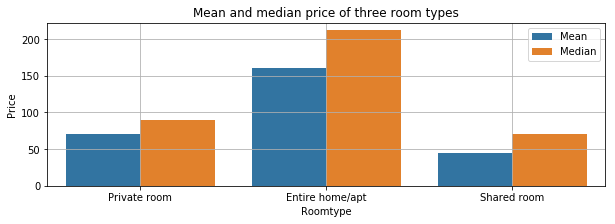

In [28]:
# Bar chart which shows the price of the rooms in different room types

# Retrieve the mean and median of 'price'
median=df.groupby(['room_type'])[['price']].median()
mean=df.groupby(['room_type'])[['price']].mean()

median_list=[]
mean_list=[]

for i in median['price']:
    median_list.append(i)
    
for i in mean['price']:
    mean_list.append(i)
    
x=['Private room','Entire home/apt','Shared room']

# Stores all the data to be presented in the graph to a dataframe
roomtype_price = pd.DataFrame(zip(x*3, ["Mean"]*3+["Median"]*3, 
                median_list+mean_list), columns=["Roomtype", "", "Price"]) 

# Adjust the size of the graph
plt.figure(figsize=(10, 3))

# Plot the bar 
sns.barplot(x="Roomtype", y="Price", hue="", data=roomtype_price)
plt.title("Mean and median price of three room types") #title of the graph
plt.grid(True) #present the grid within the graph
plt.show()

The graph above shows that 'Entire home/apt' is the most expensive room type. This is logical as entire home and apartment is usually bigger in size comparing to other two, therefore a greater rent or price has to be paid to compensate that.

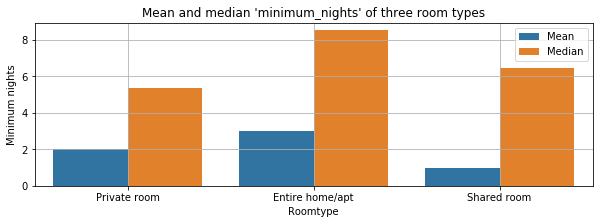

In [29]:
# Bar chart which shows the minimum night(s) of stay in different room types

# Retrieve the mean and median of 'minimum_nights'
median=df.groupby(['room_type'])[['minimum_nights']].median()
mean=df.groupby(['room_type'])[['minimum_nights']].mean()

median_list=[]
mean_list=[]

for i in median['minimum_nights']:
    median_list.append(i)
    
for i in mean['minimum_nights']:
    mean_list.append(i)
    
x=['Private room','Entire home/apt','Shared room']

# Stores all the data to be presented in the graph to a dataframe
roomtype_nights = pd.DataFrame(zip(x*3, ["Mean"]*3+["Median"]*3, median_list+mean_list),
                  columns=["Roomtype", "", "Minimum nights"]) 

# Adjust the size of the graph
plt.figure(figsize=(10, 3))

# Plot the bar 
sns.barplot(x="Roomtype", y="Minimum nights", hue="", data=roomtype_nights)
plt.title("Mean and median 'minimum_nights' of three room types") #title of the graph
plt.grid(True) #present the grid within the graph
plt.show()

For room type and amount of nights minimum, hosts of 'Entire home/apt' have set a greater amount on minimum nights. This can be attributed to the more costly services for example, housekeeping, that entire home and apartment has to provide due to a larger area; therefore, hosts of 'Entire home/apt' generally will set a higher minimum nights to prevent costly service provision due to high turnover rate.

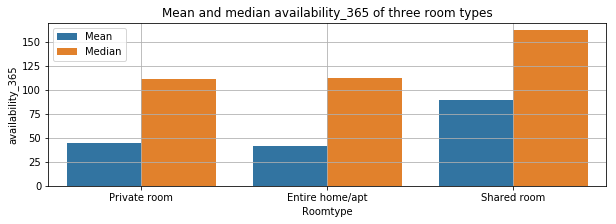

In [30]:
# Bar chart which shows the room availability in different room types

# Retrieve the mean and median of 'availability_365'
median=df.groupby(['room_type'])[['availability_365']].median()
mean=df.groupby(['room_type'])[['availability_365']].mean()


median_list=[]
mean_list=[]

for i in median['availability_365']:
    median_list.append(i)
    
for i in mean['availability_365']:
    mean_list.append(i)
    
x=['Private room','Entire home/apt','Shared room']

# Stores all the data to be presented in the graph to a dataframe
roomtype_avail = pd.DataFrame(zip(x*3, ["Mean"]*3+["Median"]*3, median_list+mean_list),
                 columns=["Roomtype", "", "availability_365"])

# Adjust the size of the graph
plt.figure(figsize=(10, 3))

# Plot the bar
sns.barplot(x="Roomtype", y="availability_365", hue="", data=roomtype_avail)
plt.title("Mean and median availability_365 of three room types") #title of the graph
plt.grid(True) #present the grid within the graph
plt.show()

For room type and room availability, we found out that share room has the highest number of days available among the three room types. This result can be justified by the nature of each room type, since shared room is the only type of room that a user will use in common with other strangers, a room may accept booking from multiple parties at the same time; therefore, there will be a higher chance for shared room to be available for booking while it is listed.

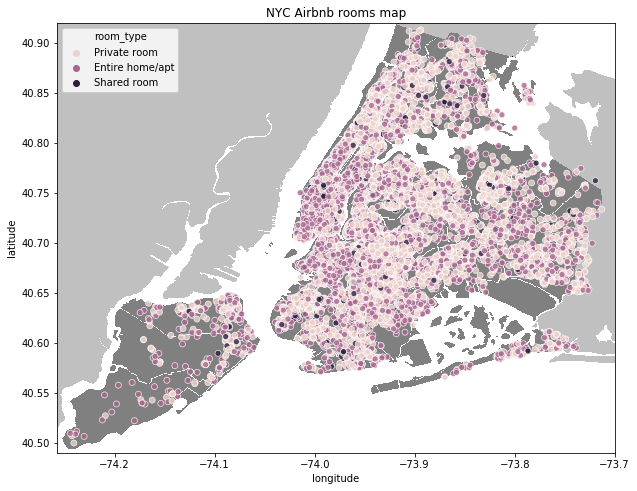

In [31]:
#Scatterplot indicating the location of different room type

plt.figure(figsize=(10,8))

# df_long and df_lat from the previous codes which longitude and latitude values of the rroms
ax = sns.scatterplot(df_long,df_lat,hue=df.room_type,alpha=0.8)

#adjust the legend of the graph
L=plt.legend()
L.get_texts()[1].set_text('Private room')
L.get_texts()[2].set_text('Entire home/apt')
L.get_texts()[3].set_text('Shared room')

plt.imshow(img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
plt.title('NYC Airbnb rooms map')
plt.show()

For room type and location, we can realize that the distribution of room type is not random, for example, rooms in south-west Manhattan (40.75, -74.0) are mainly 'Entire home/apt'. Therefore, the location of a room may indicate its room type. 

## Step 5: Analyze and Transform Data (QA1)

In [32]:
# The features used for training the model
features_df = ['neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn','neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'longitude', 'price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365']

# The target/label that the model aims for
label = 'room_type'

X = df_OHE[features_df]   # Input data to be used in the model training
y = df_OHE[label]         # The real output of the dataset

In [33]:
# Shape of X and y
print(X.shape)
print(y.shape)

(48895, 9)
(48895,)


In [34]:
# Split both input data and output into training data (75%) and testing data (25%)
X_train, X_validate, y_train, y_validate = train_test_split(X,y,test_size=0.25,random_state=0)

In [35]:
#Shape of the training and testing data
print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)
print(y_validate.shape)

(36671, 9)
(36671,)
(12224, 9)
(12224,)


## Step 6-7: Develop / Train Models   +   Validate / Test Models

### Baseline Model

In [36]:
# Baseline assumptions is based off room_type mean analysis

df.groupby(['neighbourhood_group','room_type'])[['price']].mean()

price
neighbourhood_group room_type            
Bronx               0           66.890937
                    1          127.506596
                    2           59.800000
Brooklyn            0           76.545428
                    1          178.346202
                    2           50.773723
Manhattan           0          116.776622
                    1          249.257994
                    2           88.977083
Queens              0           71.762456
                    1          147.050573
                    2           69.020202
Staten Island       0           62.292553
                    1          173.846591
                    2           57.444444

In [37]:
# BASELINE MODEL

def simple_heuristics(airbnbdf):
    
    # predict whether or not the airbnb units are a private room (0), entire home/apt (1), or shared room (2).
        # 1) if the price of the airbnb unit is more than or equal to $150 then it is an ENTIRE HOME/APT
        # 2) if the price of the airbnb unit is more than or equal to $50 and less than $150 then it is a PRIVATE ROOM
        # 3) all other airbnb units is a SHARED ROOM
    
    predictions = []
    for airbnb_index, airbnb in airbnbdf.iterrows():
        if airbnb['price'] >= 150:
            predictions.append(1)
        elif airbnb['price'] >= 50 and airbnb['price'] < 150:
            predictions.append(0)
        else:
            predictions.append(2)
    return predictions


# calculate the accuracy of the baseline model
def simple_heuristics_accuracy(airbnbdf,label):
    
    # the accuracy of the function 'simple_heuristics'
    #label = the real data to compare with 
    
    predictions = simple_heuristics(airbnbdf)
    correct = sum(predictions == label)
    accuracy = correct/len(label)
    return accuracy

In [38]:
# Prediction scores of the model for validating data
Score_validate_BL = simple_heuristics_accuracy(X_validate, y_validate)

print('Baseline accuracy: ', Score_validate_BL)

Baseline accuracy:  0.650523560209424


## Predictive Model

### 1. Logistic Regression

In [39]:
#QA2

# LOGISTIC REGRESSION

# To ignore the warnings
from warnings import filterwarnings
filterwarnings('ignore')

# A list to store all the available solvers' names
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
 
for i in solver:
    try:
        # Create the Logistic Regression model
        model_LR = LogisticRegression(solver = i,multi_class='multinomial')
        
        # Fit the training data to the model
        model_LR.fit(X_train, y_train)
        
        # Prediction scores of the model with training data
        Score_train_LR = model_LR.score(X_train, y_train)
        
        # Prediction scores of the model with testing data
        Score_validate_LR = model_LR.score(X_validate, y_validate)
        
        
        print('Training Score for solver {}: '.format(i), Score_train_LR)
        print('Validation Score for solver {}:'.format(i), Score_validate_LR)
        print('')
    except:
        pass


Training Score for solver newton-cg:  0.7966785743503041
Validation Score for solver newton-cg: 0.7972840314136126

Training Score for solver lbfgs:  0.7971421559270268
Validation Score for solver lbfgs: 0.7982657068062827

Training Score for solver sag:  0.7932698862861661
Validation Score for solver sag: 0.7927846858638743

Training Score for solver saga:  0.7931062692590876
Validation Score for solver saga: 0.7923756544502618



After investigation, lbfgs is still the best solver as it has the highest validation score out of all 5 solver, results of solver ‘liblinear’ didn’t appear as it is incompatible with multiclass setting. 

### 1. Logistic Regression

In [40]:
# BETTER MODELS (LOGISTIC REGRESSION)

# Create the Logistic Regression model
model_LR = LogisticRegression(solver='lbfgs',max_iter=500,multi_class='multinomial')

# Fit the training data to the model
model_LR.fit(X_train, y_train)

# Prediction scores of the model with training data
Score_train_LR = model_LR.score(X_train, y_train)

# Prediction scores of the model with testing data
Score_validate_LR = model_LR.score(X_validate, y_validate)

print('Training Score: ', Score_train_LR)
print('Validation Score: ', Score_validate_LR)

Training Score:  0.7971421559270268
Validation Score:  0.7980202879581152


### 2. Random Forest Classifier

In [41]:
# RANDOM FOREST CLASSIFIER

# Create the Random Forest Classifier model
model_RF = RandomForestClassifier(n_estimators = 100)

# Fit the training data to the model
model_RF.fit(X_train, y_train)

# Prediction scores of the model with training data
Score_train_RF = model_RF.score(X_train, y_train)

# Prediction scores of the model with testing data
Score_validate_RF = model_RF.score(X_validate, y_validate)

print('Training Score: ', Score_train_RF)
print('Validation Score: ', Score_validate_RF)

Training Score:  0.9997818439638951
Validation Score:  0.840559554973822


### 3. Decision Tree Classifier

In [42]:
# DECISION TREE CLASSIFIER

# Create the Decision Tree Classifier model
model_DT = DecisionTreeClassifier()

# Fit the training data to the model
model_DT.fit(X_train, y_train)

# Prediction scores of the model with training data
Score_train_DT = model_DT.score(X_train, y_train)

# Prediction scores of the model with testing data
Score_validate_DT = model_DT.score(X_validate, y_validate)

print('Training Score: ', Score_train_DT)
print('Validation Score: ', Score_validate_DT)

Training Score:  0.9998363829729214
Validation Score:  0.7756871727748691


### 4. K-nearest Neighbour (KNN)

In [43]:
# K-NEAREST NEIGHBOUR
from sklearn.neighbors import KNeighborsClassifier

# Create the K-nearest Neighbour model
model_KNN = KNeighborsClassifier()

# Fit the training data to the model
model_KNN.fit(X_train, y_train)

# Prediction scores of the model with training data
Score_train_KNN = model_KNN.score(X_train, y_train)

# Prediction scores of the model with testing data
Score_validate_KNN = model_KNN.score(X_validate, y_validate)

print('Training Score: ', Score_train_KNN)
print('Validation Score: ', Score_validate_KNN)

Training Score:  0.8562624417114341
Validation Score:  0.8115183246073299


### 5. Neural Network

In [44]:
# NEURAL NETWORK (MLP)

# Create the MLP Classifier model
model_MLP = MLPClassifier()

# Fit the training data to the model
model_MLP.fit(X_train,y_train)

# Prediction scores of the model with training data
Score_train_MLP = model_MLP.score(X_train,y_train)

# Prediction scores of the model with testing data
Score_validate_MLP = model_MLP.score(X_validate,y_validate)

print('Training Score: ', Score_train_MLP)
print('Validation Score: ', Score_validate_MLP)

Training Score:  0.8262932562515339
Validation Score:  0.8299247382198953


### 6. Support-Vecttor Machine (SVM)

In [45]:
# SUPPORT-VECTOR MACHINE (SVM)

# Must standardize the data if you want to use SVM
# Scale and standardize the data before training the model
# (the scaler is based on training data as you don't want to 
# involve the testing data in scaling which may cause overfitting)

scaler = StandardScaler()
scaler.fit(X_train,y_train)  

# Training dataset after scaling
X_train_ss = scaler.transform(X_train)

# Testing dataset after scaling
X_validate_ss = scaler.transform(X_validate)

# Create the Support-vector Classifier model 
model_SVM = SVC()

# Fit the standardized training data to the model
model_SVM.fit(X_train_ss,y_train)

# Prediction scores of the model with standardized training data
Score_train_SVM = model_SVM.score(X_train_ss, y_train)

# Prediction scores of the model with standardized testing data
Score_validate_SVM = model_SVM.score(X_validate_ss, y_validate)

print('Training Score: ', Score_train_SVM)
print('Validation Score: ', Score_validate_SVM)

Training Score:  0.829238362738949
Validation Score:  0.8276341623036649


## Model Evaluation

### 1. Prediction Scores

In [46]:
# Summary of Prediction score


model_all = {
    'Model':['Logistic Regression','RandomForest','Decision Tree','K-Nearest Neighbour','Neural Network','SVM'],
    'Accuracy (Training)':[Score_train_LR,Score_train_RF,Score_train_DT,Score_train_KNN,Score_train_MLP,Score_train_SVM],
    'Accuracy (Testing)':[Score_validate_LR,Score_validate_RF,Score_validate_DT,Score_validate_KNN,Score_validate_MLP,Score_validate_SVM]
}

model_all_df = pd.DataFrame(model_all)
model_all_df

,Model,Accuracy (Training),Accuracy (Testing)
0,Logistic Regression,0.797142,0.798020
1,RandomForest,0.999782,0.840560
2,Decision Tree,0.999836,0.775687
3,K-Nearest Neighbour,0.856262,0.811518
4,Neural Network,0.826293,0.829925
5,SVM,0.829238,0.827634


### 2. Confusion Matrix
The confusion matrix is a table which shows the count of the predicted values based on their real outcome. The horizontal and vertical axes represent the predicted values and the real outcome respectively. For example, the box in (x = 1, y = 2) indicates the count of (real outcome = 2) which are predicted as 1 (predicted value = 1).

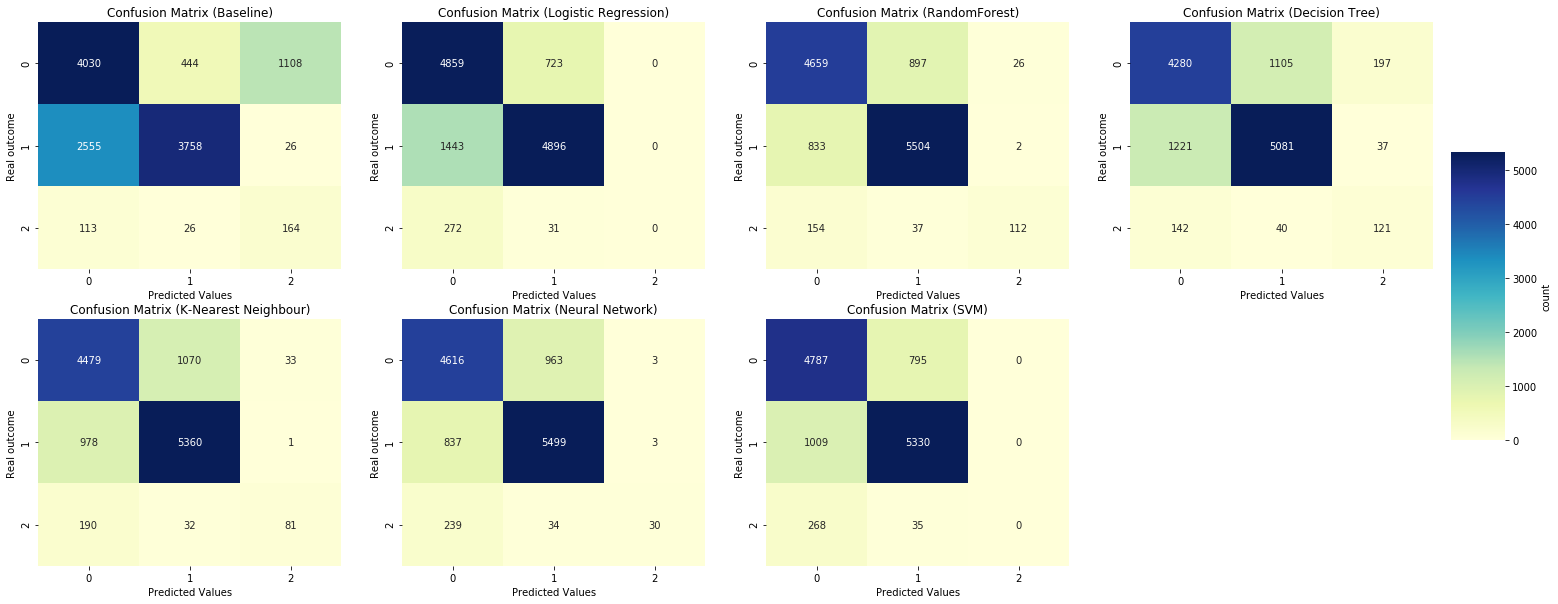

In [47]:
#CONFUSION MATRIX

# Create the plot
fig, axes = plt.subplots(2,4,figsize = (25,10))
cbar_ax = fig.add_axes([.91, .3, .03, .4])
# A list to store all the models
model_list = [model_LR,model_RF,model_DT,model_KNN,model_MLP,model_SVM]

# A list to store all the model names
model_name = ['Baseline','Logistic Regression','RandomForest','Decision Tree','K-Nearest Neighbour','Neural Network','SVM']

# Predictions with different models
predval = [model.predict(X_validate_ss) if model == model_SVM else model.predict(X_validate) for model in model_list]

# Create the confusion matrix of baseline model
conf_matrix = confusion_matrix(y_validate, simple_heuristics(X_validate))
sns.heatmap(conf_matrix,annot = True,cmap="YlGnBu",fmt = 'g',ax = axes[0,0],cbar = False,
            cbar_kws={'label': 'count'})
axes[0,0].set_ylim(3,0)
axes[0,0].set_ylabel('Real outcome')
axes[0,0].set_xlabel('Predicted Values')
axes[0,0].set_title('Confusion Matrix ({})'.format('Baseline'))
    
# Create the confusion matrix of the predictive models
for i in range(1,7):
    if i > 3:
        col = i - 4
        row = 1
    else:
        col = i 
        row = 0
    
    conf_matrix = confusion_matrix(y_validate, predval[i-1])
    sns.heatmap(conf_matrix,annot = True,cmap="YlGnBu",fmt = 'g',ax = axes[row,col],cbar = True,
                cbar_kws={'label': 'count'},cbar_ax = cbar_ax)
    axes[row,col].set_ylim(3,0)
    axes[row,col].set_ylabel('Real outcome')
    axes[row,col].set_xlabel('Predicted Values')
    axes[row,col].set_title('Confusion Matrix ({})'.format(model_name[i]))

axes[1,3].remove()
plt.show()

## Business Discussion (Conclusion)

From the performance of the predictive models,  'Logistic Regression' and 'Neural Network' are chosen initially for solving our business problem (What is the room types of the rooms based on its features). The reason for us to choose these two models are as follows: <br/>
1. Higher accuracy than the baseline
2. The performance in training data and testing data doesn't differ a lot (to avoid overfitting if it performs much better with the training data)

To provide an accurate prediction, the host is required to input the below criteria correctly:
1. Room Address
2. Room price per night
3. Minimum night(s) of stay
4. Amount of listing per host
5. Number of days when listing is available for booking

Yet, from the confusion matrix of Logistic Regression, we found that the model doesn't make any predictions with the value = 2 (Shared Room). It is hard to tell why the model only predicted 0 or 1 for room types. The possible reasons are as follows:
1. 'Shared Room' only accounts for 2% of the original dataset. It is not abnormal for the model to make only few or zero predictions with value = 2 according to its proportion.
2. No significant factors or criteria to classify the room type 'Shared room'

Therefore, in order to come up with a more precise model, 'Neural Network' is more preferred which has a better performance than Logistic Regression in both training and testing data, and also a better model for multiclass  predictions based on the nature of our dataset.